In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import MaxNLocator
import math
import seaborn as sns

In [6]:
df = pd.read_csv('p_train.csv')
st = pd.read_csv('PerStatus.csv')
df

,yyyy,sex,Job classification,Job level,Factory code,Layers of management,Work experience1,Work experience2,Work experience3,Work experience4,...,Marital Status,Job tenure level A,Job tenure level B,Job tenure level C,Average number of years of work before employment,Graduated School category,Graduated Department category,Family numbers,Commuting cost,Affiliated department
0,2014,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,...,1.0,2.0,1.0,1.0,2.0,0.0,5.0,0.0,8.0,19138.0
1,2015,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,...,1.0,2.0,2.0,1.0,2.0,0.0,5.0,2.0,8.0,19138.0
2,2016,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,...,1.0,2.0,2.0,1.0,2.0,0.0,5.0,2.0,8.0,19138.0
3,2017,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,...,1.0,2.0,2.0,1.0,2.0,0.0,5.0,2.0,8.0,19138.0
4,2014,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,5.0,5.0,0.0,0.0,4.0,1.0,2.0,8.0,8181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,2014,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,6.0,5.0,2.0,1.0,3.0,8.0,2.0,8.0,8012.0
14388,2015,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,6.0,5.0,2.0,1.0,3.0,8.0,2.0,8.0,8012.0
14389,2016,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,7.0,6.0,2.0,1.0,3.0,8.0,2.0,8.0,8012.0
14390,2017,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,7.0,6.0,2.0,1.0,3.0,8.0,2.0,8.0,8012.0


In [4]:
for i in range(len(df)):
    if df.loc[i, :].isna().sum() == 44:
        df.loc[i, 'PerNo'] = 0

In [7]:
attri = []
for atr in df:
    attri.append(atr)
    
attri

['yyyy',
 'PerNo',
 'PerStatus',
 'sex',
 'Job classification',
 'Job level',
 'Factory code',
 'Layers of management',
 'Work experience1',
 'Work experience2',
 'Work experience3',
 'Work experience4',
 'Work experience5',
 'Project Hours',
 'Project Numbers',
 'Current project position',
 'Percentage of Special project',
 'Working place',
 'Training hours A',
 'Training hours B',
 'Training hours C',
 'Total production',
 'Number of Honors',
 'Promotion or Not Promotion',
 'Promotion speed',
 'Number of leave in recent three months A',
 'Number of leave in the past year A',
 'Number of leave in recent three months B',
 'Number of leave in the past year B',
 'Business Trip A',
 'Business Trip B',
 'Business Trip Concentration',
 'Annual performance level A',
 'Annual performance level B',
 'Annual performance level C',
 'Age level',
 'Marital Status',
 'Job tenure level A',
 'Job tenure level B',
 'Job tenure level C',
 'Average number of years of work before employment',
 'highest e

In [128]:
stat = data.loc[:, 'PerStatus']
perno = data.loc[:, 'PerNo']
year = data.loc[:, 'yyyy']

In [22]:
sex = data.loc[:, 'sex']

sex.fillna('ffill')

res_f = 0
res_m = 0
for (s, st) in zip(sex, stat):
    if s == 0 and st == 1:
        res_f += 1
    elif s == 1 and st == 1:
        res_m += 1
        
print(res_f, res_m)

154 639


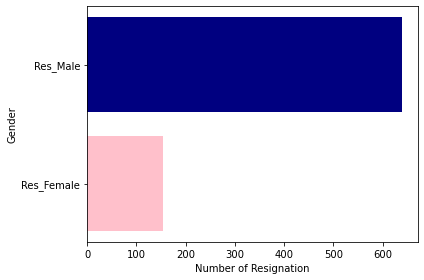

In [23]:
plt.barh(['Res_Female', 'Res_Male'], [res_f, res_m], color=['pink', 'navy'])
plt.xlabel('Number of Resignation')
plt.ylabel('Gender')

plt.tight_layout()
plt.show()

{2014: 238, 2015: 183, 2016: 200, 2017: 175}


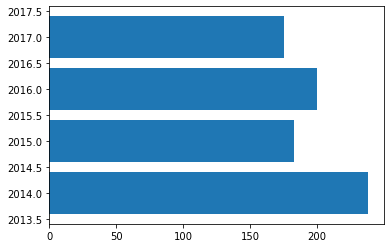

In [24]:
year_v = {2014:0, 2015:0, 2016:0, 2017:0}

for i, s in enumerate(stat):
    if s == 1:
        year_v[year[i]] += 1
        
key = [int(y) for y in year_v]
val = [int(v) for v in year_v.values()]
plt.barh(key, val)
print(year_v)

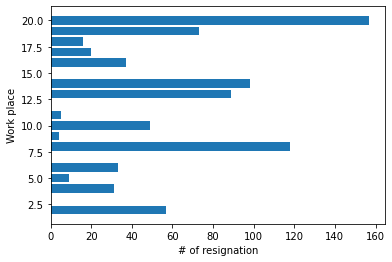

{2: 57, 4: 31, 5: 9, 6: 33, 8: 118, 9: 4, 10: 49, 11: 5, 13: 89, 14: 98, 16: 37, 17: 20, 18: 16, 19: 73, 20: 157}


In [25]:
wp = data.loc[:, '廠區代碼']

wp = wp.ffill().astype(int)

s = data.pivot_table(index = '廠區代碼', aggfunc='size')
wps = []
for val in s.keys().astype(int):
    wps.append(val)

wp_cnt = dict.fromkeys(wps, 0)

for i, s in enumerate(stat):
    if s == 1:
        wp_cnt[int(wp[i])] += 1
        
key = [int(k) for k in wp_cnt.keys()]
val = [int(val) for val in wp_cnt.values()]

plt.barh(key, val)
plt.xlabel('# of resignation')
plt.ylabel('Work place')
plt.show()
print(wp_cnt)

In [29]:
rank = data.loc[:, '職等']
rank = rank.ffill().astype(int)

In [247]:
res = pd.DataFrame()

for i, s in enumerate(stat):
    if s == 1:
        res = res.append(df.loc[i, :])
        
print(len(res))

796


In [236]:
res.describe()

,PerNo,PerStatus,sex,yyyy,任職前工作平均年數,出差數A,出差數B,出差集中度,升遷速度,婚姻狀況,...,管理層級,職等,訓練時數A,訓練時數B,訓練時數C,近一年請假數A,近一年請假數B,近三月請假數A,近三月請假數B,通勤成本
count,796.000000,796.0,793.000000,796.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,...,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,4327.510050,1.0,0.805801,2015.391960,0.605296,1.332913,0.355612,1.244641,2.015132,1.389660,...,1.757881,4.629256,0.564943,0.382093,2.027743,6.800757,0.204288,2.994956,0.139975,8.358134
std,2535.952424,0.0,0.395833,1.130319,0.715501,1.102174,0.802236,1.916350,1.322789,0.490561,...,1.482862,1.738963,1.314692,1.572822,1.605463,1.751089,0.938046,1.928645,0.697636,1.390030
min,11.000000,1.0,0.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
25%,2123.000000,1.0,1.000000,2014.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,3.000000,0.000000,0.000000,1.000000,6.000000,0.000000,2.000000,0.000000,8.000000
50%,4226.000000,1.0,1.000000,2015.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,...,1.000000,4.000000,0.000000,0.000000,1.000000,6.000000,0.000000,3.000000,0.000000,8.000000
75%,6615.250000,1.0,1.000000,2016.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,1.000000,7.000000,1.000000,0.000000,3.000000,8.000000,0.000000,4.000000,0.000000,8.000000
max,8769.000000,1.0,1.000000,2017.000000,5.000000,10.000000,9.000000,14.000000,9.000000,3.000000,...,6.000000,7.000000,10.000000,15.000000,10.000000,11.000000,8.000000,12.000000,8.000000,16.000000


In [237]:
res.iloc[:, 2:14].describe()

,sex,yyyy,任職前工作平均年數,出差數A,出差數B,出差集中度,升遷速度,婚姻狀況,專案時數,專案總數,工作分類,工作地點
count,793.000000,796.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,0.805801,2015.391960,0.605296,1.332913,0.355612,1.244641,2.015132,1.389660,21.846154,1.940731,1.049180,5.853720
std,0.395833,1.130319,0.715501,1.102174,0.802236,1.916350,1.322789,0.490561,3.517853,0.964139,0.216381,1.129847
min,0.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2014.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,22.000000,1.000000,1.000000,6.000000
50%,1.000000,2015.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,23.000000,2.000000,1.000000,6.000000
75%,1.000000,2016.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,23.000000,2.000000,1.000000,6.000000
max,1.000000,2017.000000,5.000000,10.000000,9.000000,14.000000,9.000000,3.000000,24.000000,7.000000,2.000000,11.000000


In [238]:
res.iloc[:, 14:26].describe()

,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,年度績效等級A,年度績效等級B,年度績效等級C,年資層級A,年資層級B,年資層級C,年齡層級
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,0.050441,0.056747,0.049180,0.039092,0.351828,4.986129,4.501892,3.383354,2.715006,2.223203,1.061791,5.977301
std,0.218992,0.231504,0.216381,0.193936,0.477842,3.240925,3.159131,1.332130,1.661200,1.524834,1.546408,2.762847
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,7.000000,5.000000,3.000000,3.000000,2.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,5.000000,8.000000,8.000000,9.000000,13.000000


In [239]:
res.iloc[:, 26:38].describe()

,廠區代碼,是否升遷,最高學歷,榮譽數,歸屬部門,特殊專案佔比,生產總額,畢業學校類別,畢業科系類別,當前專案角色,眷屬量,管理層級
count,793.000000,793.000000,493.000000,793.000000,793.000000,793.000000,793.000000,586.000000,793.000000,793.000000,793.000000,793.000000
mean,12.912989,0.071879,2.034483,0.559899,13011.802018,1.137453,7.312736,3.621160,5.548550,4.132409,0.789407,1.757881
std,5.772299,0.258450,0.203695,1.054934,5768.876692,2.247338,8.685763,0.871091,2.274802,1.620223,0.900218,1.482862
min,2.000000,0.000000,1.000000,0.000000,2029.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,8.000000,0.000000,2.000000,0.000000,8145.000000,0.000000,2.000000,3.000000,3.000000,5.000000,0.000000,1.000000
50%,14.000000,0.000000,2.000000,0.000000,14040.000000,0.000000,5.000000,4.000000,6.000000,5.000000,1.000000,1.000000
75%,19.000000,0.000000,2.000000,1.000000,19043.000000,1.000000,10.000000,4.000000,8.000000,5.000000,1.000000,1.000000
max,20.000000,1.000000,3.000000,9.000000,20208.000000,15.000000,100.000000,5.000000,9.000000,5.000000,3.000000,6.000000


In [240]:
res.iloc[:, 38:48].describe()

,職等,訓練時數A,訓練時數B,訓練時數C,近一年請假數A,近一年請假數B,近三月請假數A,近三月請假數B,通勤成本
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,4.629256,0.564943,0.382093,2.027743,6.800757,0.204288,2.994956,0.139975,8.358134
std,1.738963,1.314692,1.572822,1.605463,1.751089,0.938046,1.928645,0.697636,1.390030
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
25%,3.000000,0.000000,0.000000,1.000000,6.000000,0.000000,2.000000,0.000000,8.000000
50%,4.000000,0.000000,0.000000,1.000000,6.000000,0.000000,3.000000,0.000000,8.000000
75%,7.000000,1.000000,0.000000,3.000000,8.000000,0.000000,4.000000,0.000000,8.000000
max,7.000000,10.000000,15.000000,10.000000,11.000000,8.000000,12.000000,8.000000,16.000000


In [7]:
staying_rate = (df['PerStatus'].value_counts()[0] - df['PerStatus'].value_counts()[1]) / df['PerStatus'].value_counts()[0]
staying_rate

0.9414533686378347

In [8]:
#for a in attri:
    #fig = sns.countplot(x=a, hue='PerStatus', data=df)
    #fig.figure.savefig('plots/{}_bar.png'.format(a))

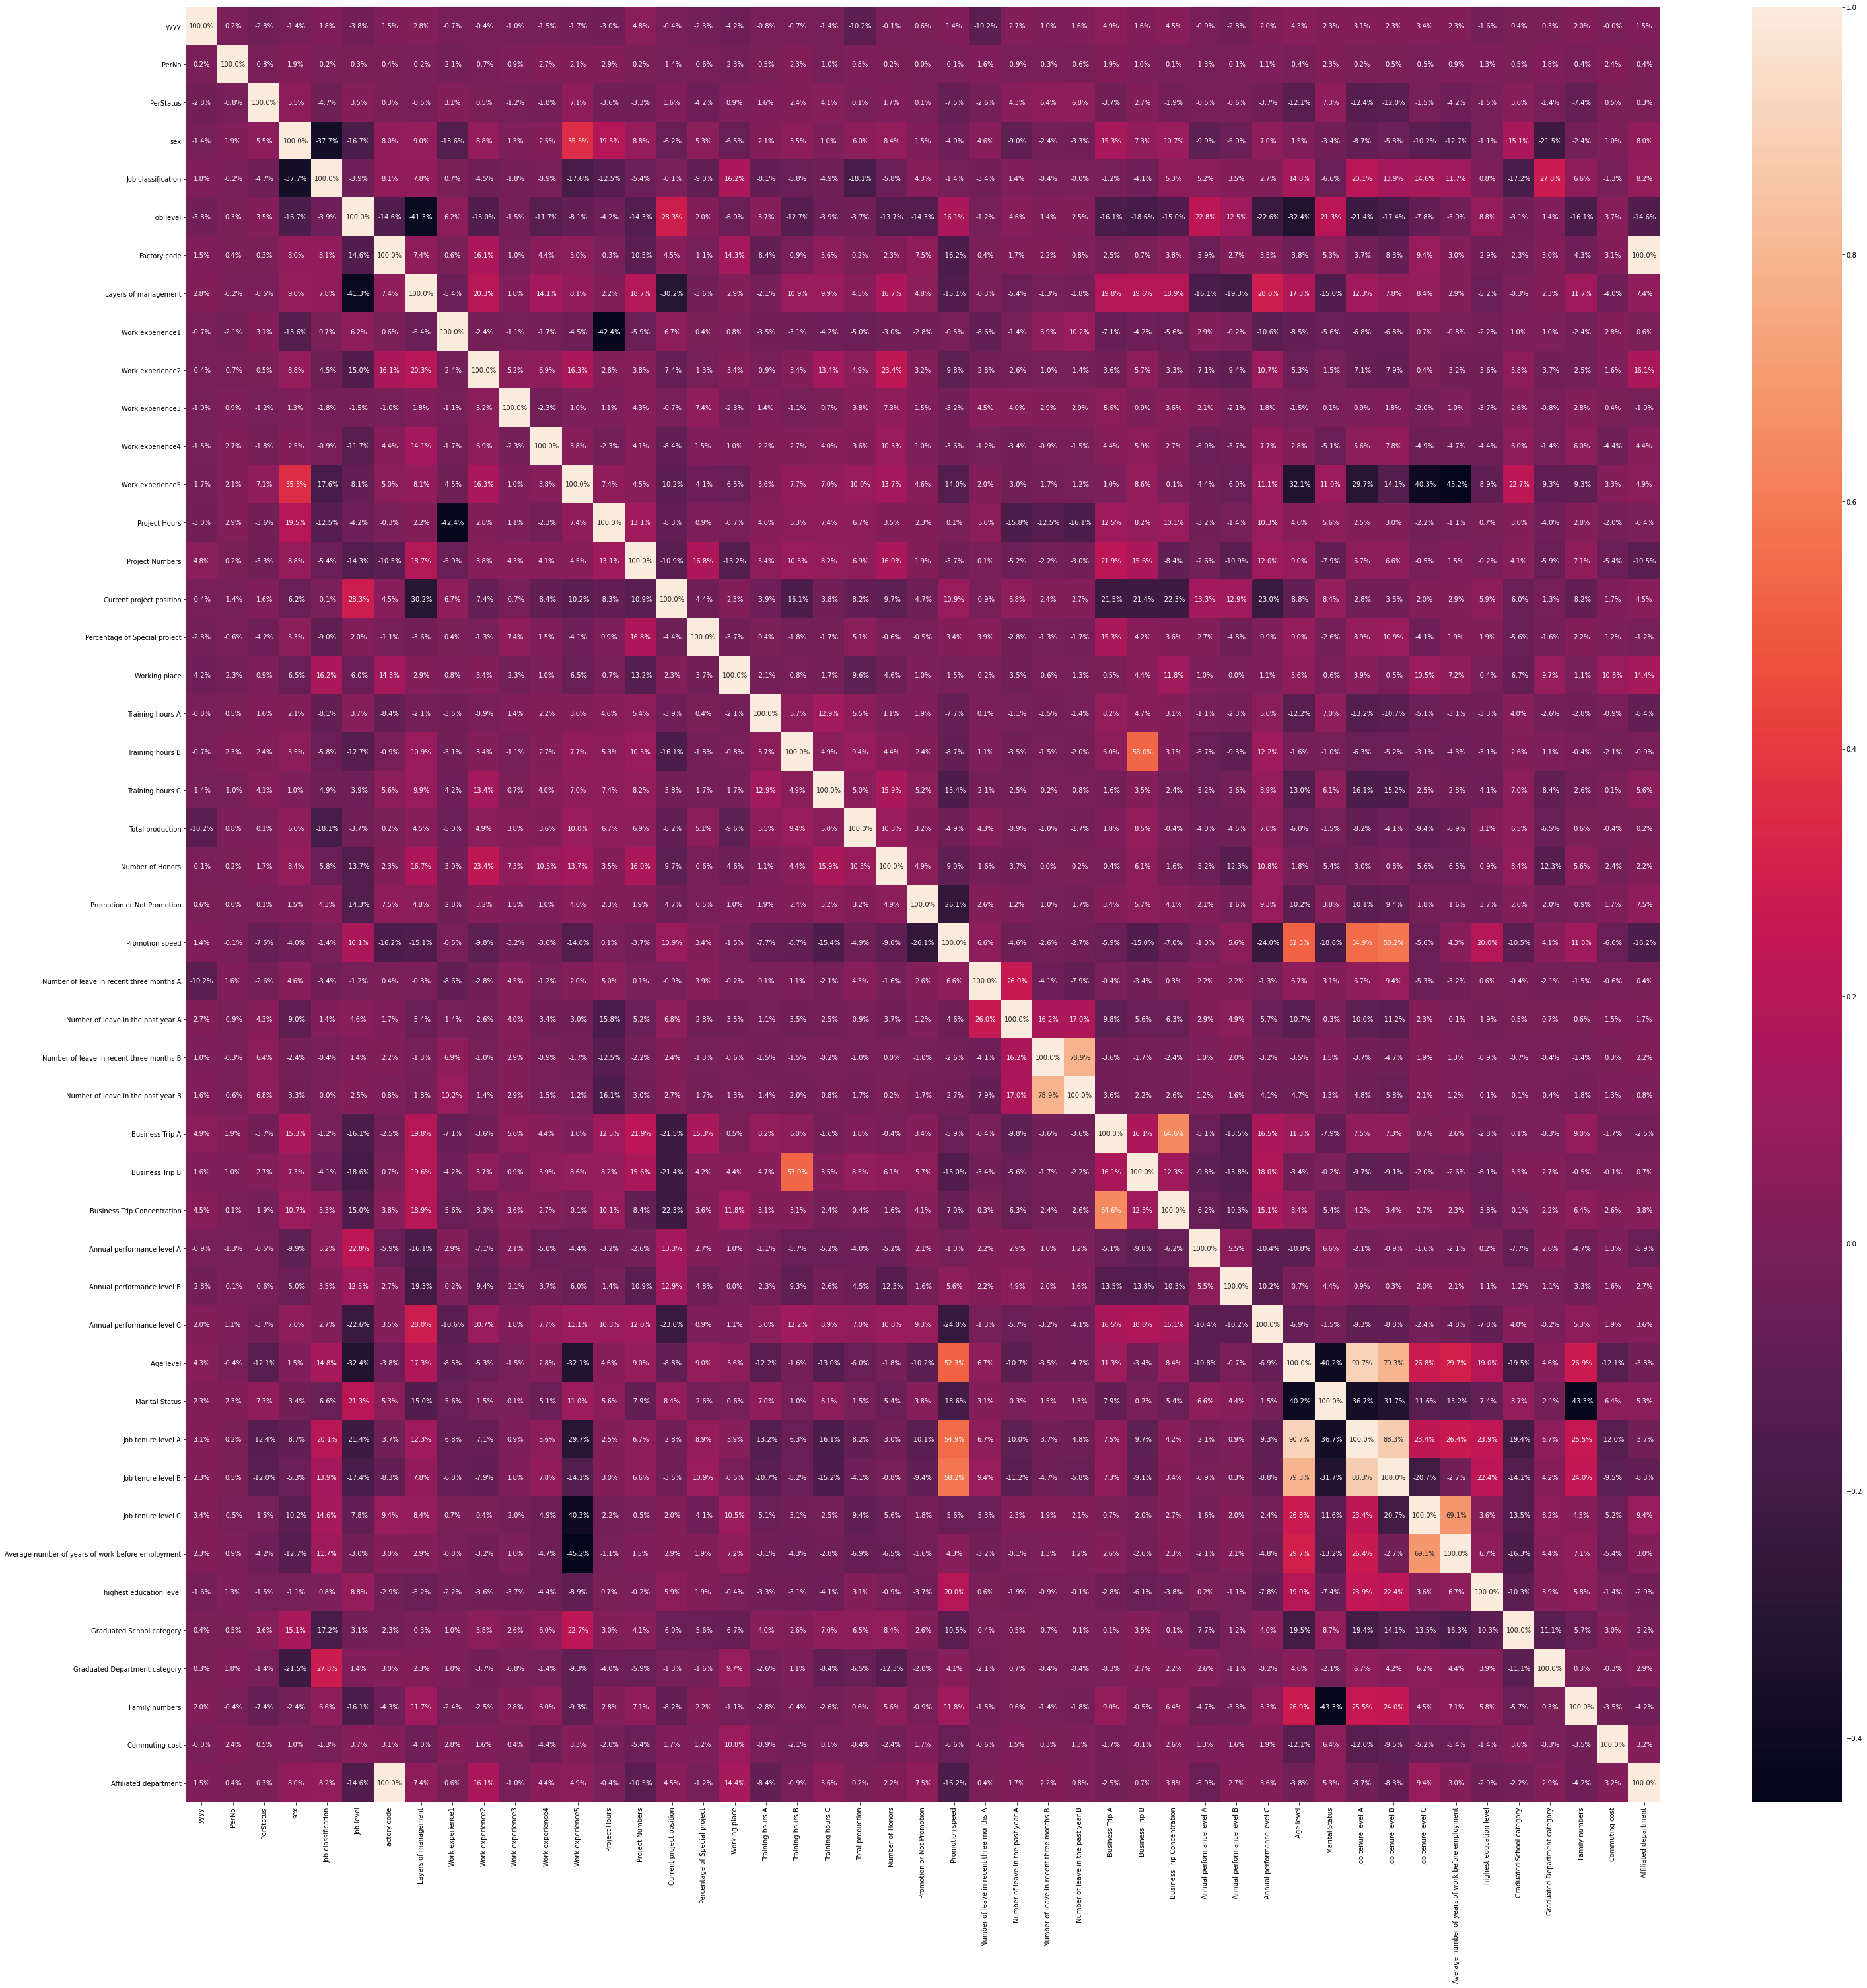

In [9]:
plt.figure(figsize=(50, 50))
fig = sns.heatmap(df.corr(), annot=True, fmt='.1%')
fig.figure.savefig('plots/heatmap.png')

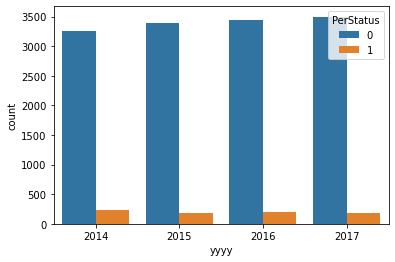

In [6]:
sns.countplot(x='yyyy', hue='PerStatus', data=df)

In [10]:
#sns.relplot(x='出差數B', y='PerStatus',kind='line', data=df)

In [11]:
new = df.T.append(st.T).T

In [19]:
abs(new.corr()['PerStatus']).sort_values()

Total production                                     0.000361
Promotion or Not Promotion                           0.000693
Factory code                                         0.003401
Affiliated department                                0.003407
Commuting cost                                       0.005359
Annual performance level B                           0.005548
Annual performance level A                           0.005651
Layers of management                                 0.005792
Work experience2                                     0.006101
Working place                                        0.008703
Work experience3                                     0.011437
Graduated Department category                        0.012820
Job tenure level C                                   0.015254
Current project position                             0.016436
Training hours A                                     0.016621
Number of Honors                                     0.017140
Work exp